In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [15]:
%matplotlib inline

In [17]:
data = {
 "State/UT": [
 "Uttar Pradesh",
 "Maharashtra",
 "Bihar",
 "West Bengal",
 "Andhra Pradesh (2011 boundaries)",
 "Madhya Pradesh",
 "Tamil Nadu"
 ],
 "Population_2011": [
 199812341, 112374333, 104099452,
 91276115, 84580777, 72626809, 72147030
 ],
 "LiteracyRate_2011": [67.68, 82.34, 61.80, 76.26, 67.02, 69.32, 80.09]
 }
df = pd.DataFrame(data)
print(df)

                           State/UT  Population_2011  LiteracyRate_2011
0                     Uttar Pradesh        199812341              67.68
1                       Maharashtra        112374333              82.34
2                             Bihar        104099452              61.80
3                       West Bengal         91276115              76.26
4  Andhra Pradesh (2011 boundaries)         84580777              67.02
5                    Madhya Pradesh         72626809              69.32
6                        Tamil Nadu         72147030              80.09


In [22]:
df["Estimated_Literate"] = (df["Population_2011"] * (df["LiteracyRate_2011"] / 100)).astype(int)
df["Estimated_NonLiterate"] = df["Population_2011"] - df["Estimated_Literate"]


In [23]:
target = 90
df["Gap_to_90_pct_points"] = (target - df["LiteracyRate_2011"]).clip(lower=0)
df["Priority_Score"] = ((df["Gap_to_90_pct_points"] / 100) * df["Population_2011"]).astype(float)

In [24]:
print("\nBasic Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State/UT               7 non-null      object 
 1   Population_2011        7 non-null      int64  
 2   LiteracyRate_2011      7 non-null      float64
 3   Estimated_Literate     7 non-null      int64  
 4   Estimated_NonLiterate  7 non-null      int64  
 5   Gap_to_90_pct_points   7 non-null      float64
 6   Priority_Score         7 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 524.0+ bytes
None

Statistical Summary:
       Population_2011  LiteracyRate_2011  Estimated_Literate  \
count     7.000000e+00           7.000000        7.000000e+00   
mean      1.052738e+08          72.072857        7.521659e+07   
std       4.430327e+07           7.584626        2.977002e+07   
min       7.214703e+07          61.800000        5.034490e+07   


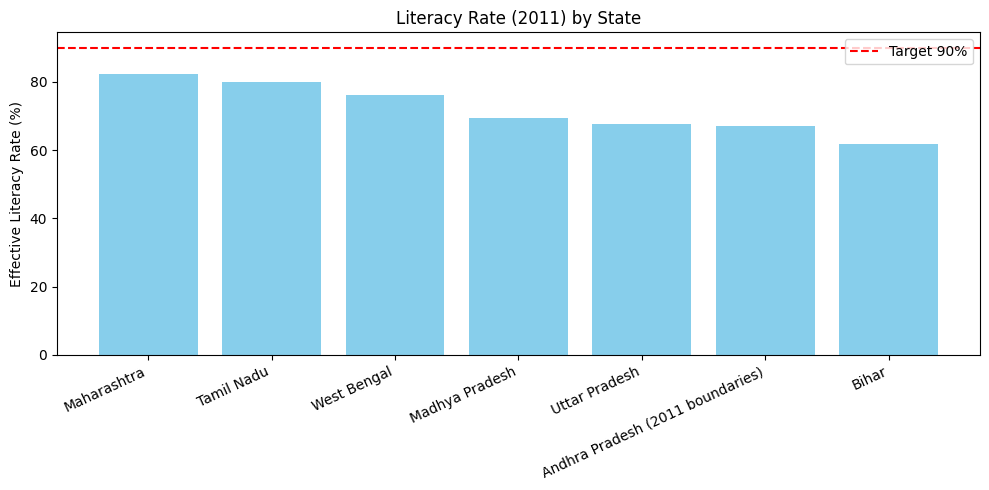

In [25]:
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values("LiteracyRate_2011", ascending=False)
plt.bar(df_sorted["State/UT"], df_sorted["LiteracyRate_2011"], color='skyblue')
plt.axhline(90, linestyle='--', color='red', label='Target 90%')
plt.title("Literacy Rate (2011) by State")
plt.ylabel("Effective Literacy Rate (%)")
plt.xticks(rotation=25, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

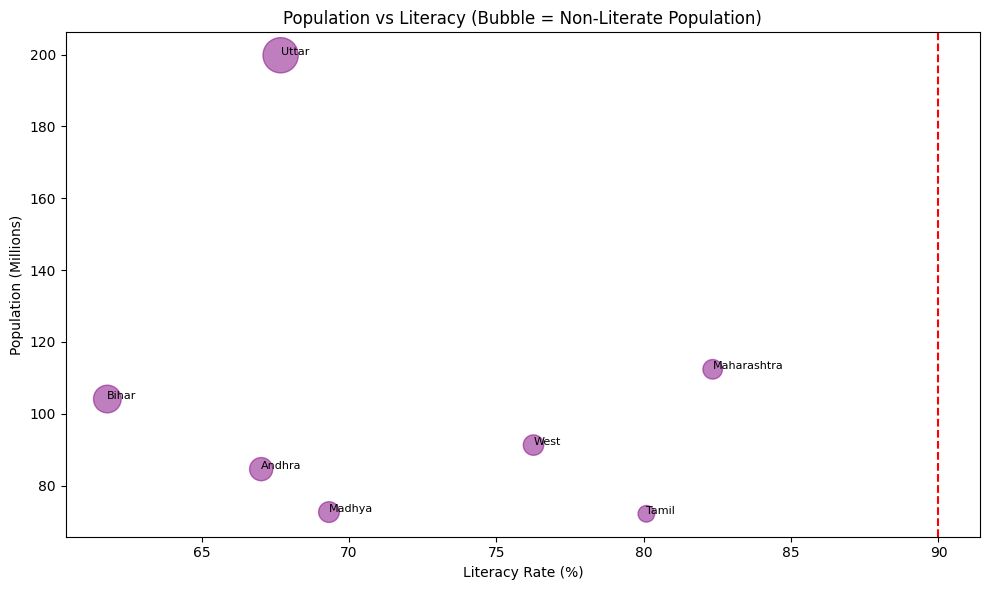

In [26]:
plt.figure(figsize=(10, 6))
sizes = (df["Estimated_NonLiterate"] / 1_000_000) * 10
plt.scatter(df["LiteracyRate_2011"], df["Population_2011"] / 1_000_000, s=sizes, alpha=0.5, color='purple')

for i, row in df.iterrows():
    plt.annotate(row["State/UT"].split()[0],
                 (row["LiteracyRate_2011"], row["Population_2011"] / 1_000_000),
                 fontsize=8)

plt.axvline(90, linestyle='--', color='red')
plt.xlabel("Literacy Rate (%)")
plt.ylabel("Population (Millions)")
plt.title("Population vs Literacy (Bubble = Non-Literate Population)")
plt.tight_layout()
plt.show()

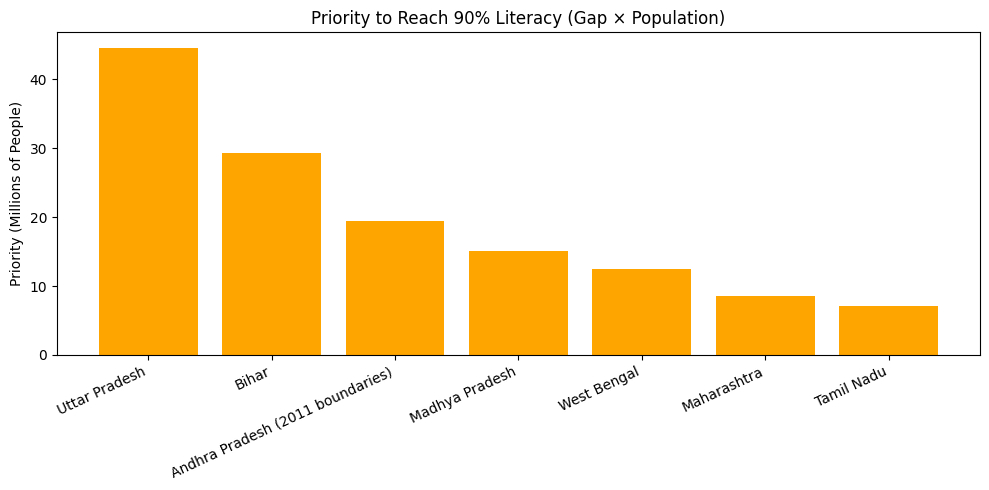

In [27]:
plt.figure(figsize=(10, 5))
priority = df.sort_values("Priority_Score", ascending=False)
plt.bar(priority["State/UT"], priority["Priority_Score"] / 1_000_000, color='orange')
plt.title("Priority to Reach 90% Literacy (Gap × Population)")
plt.ylabel("Priority (Millions of People)")
plt.xticks(rotation=25, ha="right")
plt.tight_layout()
plt.show()

In [28]:
fig = px.scatter(
    df,
    x="LiteracyRate_2011",
    y="Population_2011",
    size="Estimated_NonLiterate",
    hover_name="State/UT",
    labels={
        "Population_2011": "Population (2011)",
        "LiteracyRate_2011": "Literacy Rate (%)"
    },
    title="Literacy vs Population (Interactive Bubble Chart)"
)
fig.show()

In [29]:
df.to_csv("/content/census2011_literacy_top7.csv", index=False)
print("Data saved successfully as 'census2011_literacy_top7.csv'")

# --- Insights Summary ---
print("\nInsights Summary:")
print("1. Uttar Pradesh and Bihar have the highest literacy gap and population.")
print("2. Tamil Nadu and Maharashtra are near 80–82%, showing good progress.")
print("3. Targeted programs in UP, Bihar, and Andhra Pradesh can yield maximum impact.")

Data saved successfully as 'census2011_literacy_top7.csv'

Insights Summary:
1. Uttar Pradesh and Bihar have the highest literacy gap and population.
2. Tamil Nadu and Maharashtra are near 80–82%, showing good progress.
3. Targeted programs in UP, Bihar, and Andhra Pradesh can yield maximum impact.
